<a href="https://colab.research.google.com/github/jan-felix/SLOG/blob/master/FX_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import pandas_datareader as pdr
import os
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2021, 1, 10)
index = pd.date_range(start, end, freq="D")
os.environ["ALPHAVANTAGE_API_KEY"] = "H6AXUXK0Z2CBTV59" 

In [39]:
GOVT = pdr.av.time_series.AVTimeSeriesReader(symbols = "GOVT",start = start, end = end).read()
IVV = pdr.av.time_series.AVTimeSeriesReader(symbols = "IVV",start = start, end = end).read()

In [168]:
df =pd.merge(GOVT["close"],IVV["close"], left_index =True, right_index = True)
df.index = pd.DatetimeIndex(df.index)
df = df.resample('BM').last()

df.columns = ["GOVT","IVV"]
df = df*100/df.iloc[0,:]

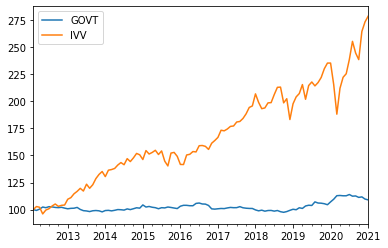

In [169]:
df.plot();

In [255]:
df_a = df.iloc[:int(len(df.index)/2),]
df_b = df.iloc[int(len(df.index)/2):,]
df_ret = df.pct_change().dropna()

In [189]:
cov_govt_ivv_a = df_a["IVV"].cov(df_a["GOVT"])
var_govt_a = df_a["GOVT"].var()
var_ivv_a = df_a["IVV"].var()

In [190]:
round(df_a["IVV"].quantile(.1),4)
#np.sqrt(var_govt_a)
#np.sqrt(var_ivv_a)

-0.0301

In [191]:
w1 = 0.56
w2 = 1-w1
mark_var = (np.square(w1)*var_govt_a + np.square(w2)*var_ivv_a + 2*w1*w2*cov_govt_ivv_a)
mark_std = np.sqrt(mark_var)
mark_std

0.013064269184122082

In [340]:
hist_window = 60
lol = list()

for n in range(hist_window, len(df_ret.index)):
  df_a = df_ret.iloc[:n,].tail(hist_window)
  cov_govt_ivv_a = df_a["IVV"].cov(df_a["GOVT"])
  var_govt_a = df_a["GOVT"].var()
  var_ivv_a = df_a["IVV"].var()
  for i in range(0,100001):
    w1 = i/100000
    w2 = 1-w1
    mark_var = (np.square(w1)*var_govt_a + np.square(w2)*var_ivv_a + 2*w1*w2*cov_govt_ivv_a)*12
    mark_std = np.sqrt(mark_var)
    if 0.075 == round(mark_std,4):
      lol.append([df_ret.index[n],w1,mark_std,var_govt_a,var_ivv_a,cov_govt_ivv_a])
      break
    if i == 100000:
      w1 = 0
      mark_std = np.sqrt((var_ivv_a*12))
      lol.append([df_ret.index[n],w1,mark_std,var_govt_a,var_ivv_a,cov_govt_ivv_a])

In [341]:
ex_a_df = pd.DataFrame(lol, columns = ["Date","GOVT_W","ex_a_std","real_VarGOVT","real_VarIVV","real_COV"])
ex_a_df.index = pd.DatetimeIndex(ex_a_df["Date"])
ex_a_df = ex_a_df[["GOVT_W","ex_a_std","real_VarGOVT","real_VarIVV","real_COV"]]

In [349]:
fut_window  = 60
df_risk = ex_a_df
for month in ex_a_df.index:
  df_period = df_ret[:month].tail(fut_window)
  period_port_ret = (ex_a_df["GOVT_W"][month]*df_period["GOVT"]+(1-ex_a_df["GOVT_W"][month])*df_period["IVV"])
  df_risk.loc[month,"forw_COV"] = df_period["IVV"].cov(df_period["GOVT"])
  df_risk.loc[month,"forw_VarGOVT"] = df_period["GOVT"].var()
  df_risk.loc[month,"forw_VarIVV"] = df_period["IVV"].var()
  df_risk.loc[month,"forw_ex_p"] = period_port_ret.std()*np.sqrt(12)

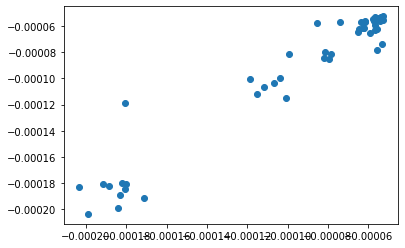

In [350]:
plt.scatter(x = df_risk["forw_COV"], y = df_risk["real_COV"], marker='o');

In [351]:
df_risk

,GOVT_W,ex_a_std,real_VarGOVT,real_VarIVV,real_COV,forw_COV,forw_VarGOVT,forw_VarIVV,forw_ex_p
Date,,,,,,,,,
2017-03-31,0.25699,0.075049,0.000100,0.000897,-0.000085,-0.000082,0.000099,0.000893,0.074981
2017-04-28,0.25636,0.075049,0.000099,0.000893,-0.000082,-0.000079,0.000097,0.000889,0.074951
2017-05-31,0.25545,0.075049,0.000097,0.000889,-0.000079,-0.000056,0.000091,0.000806,0.071973
2017-06-30,0.22502,0.075050,0.000091,0.000806,-0.000056,-0.000053,0.000091,0.000795,0.074600
2017-07-31,0.22055,0.075050,0.000091,0.000795,-0.000053,-0.000053,0.000089,0.000797,0.075125
2017-08-31,0.22130,0.075049,0.000089,0.000797,-0.000053,-0.000054,0.000091,0.000794,0.074901
2017-09-29,0.21983,0.075049,0.000091,0.000794,-0.000054,-0.000054,0.000092,0.000794,0.075018
2017-10-31,0.21952,0.075049,0.000092,0.000794,-0.000054,-0.000056,0.000092,0.000781,0.074377
2017-11-30,0.21280,0.075050,0.000092,0.000781,-0.000056,-0.000056,0.000092,0.000788,0.075385
